In [1]:
from pathlib import Path
import sys
sys.path.append('../')

In [17]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def binomial(k, N, p):
    a1_probs = p ** k
    a2_probs = (1-p) ** (N - k)
    combination = math.comb(N, k)
#    print(f'{combination} * {go} * {no_go}')
    return combination * a1_probs * a2_probs

def Z(p, N=10, B=6):
    sum_below_B = sum([k*binomial(k, N, p) for k in range(B+1)])
    sum_above_B = sum([k*binomial(k, N, p) for k in range(B+1, N+1)])
    return sum_below_B - sum_above_B

(-2.0, 2.0)

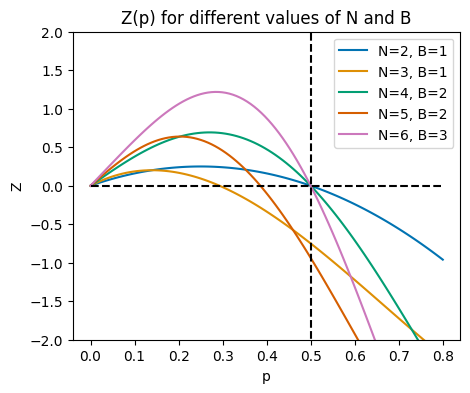

In [25]:
fig, ax = plt.subplots(figsize=(5, 4))
palette = sns.color_palette('colorblind', 6)
maximo = 0.8
mu = 0.5
for N in range(2, 7):
	B = int(N * mu)
	X = np.linspace(0, maximo, 100)
	Y = [Z(p, N, B) for p in X]
	ax = sns.lineplot(x=X, y=Y, label=f'N={N}, B={B}', color=palette[N-2])
ax.hlines(0, 0, maximo, color='black', linestyle='--')
ax.vlines(mu, -N, N, color='black', linestyle='--')
ax.set_xlabel('p')
ax.set_ylabel('Z')
ax.set_title('Z(p) for different values of N and B')
ax.set_ylim([-2, 2])

In [26]:
fig.savefig('Z.png', dpi=300)

In [6]:
from bayes_opt import BayesianOptimization

def get_p_star(N, B):
    # Bounded region of parameter space
    pbounds = {'p': (0, 1)}
    optimizer = BayesianOptimization(
        f=lambda p: Z(p, N, B),
        pbounds=pbounds,
        random_state=1,
        verbose=False
    )
    optimizer.maximize(
        init_points=10,
        n_iter=10,
    )
    result = optimizer.max
    return result['params']['p']

In [15]:
mu = 0.5
B = lambda N: int(N * mu)
values = [(N, B(N)) for N in range(2, 8)]
p_stars = list()
for N, B in values:
	p_star = get_p_star(N, B)
	p_stars.append(p_star)
	print(f'N={N}, B={B}: {p_star}')

N=2, B=1: 0.25025152270704587
N=3, B=1: 0.1394677015719169
N=4, B=2: 0.2704619033909263
N=5, B=2: 0.20295471984355998
N=6, B=3: 0.28529167695814883
N=7, B=3: 0.23844243614317487


In [18]:
df = pd.DataFrame({
	'N': [N for N, _ in values],
	'B': [B for _, B in values],
	'p_star': p_stars
})
df

,N,B,p_star
0,2,1,0.250252
1,3,1,0.139468
2,4,2,0.270462
3,5,2,0.202955
4,6,3,0.285292
5,7,3,0.238442


In [19]:
df.to_latex('p_star.tex', index=False)	